# Práctica 5. Máquinas de Soporte Vectorial

- Maravilla Pérez Vianey
- Mondolla Cervantes Erin
- Ramírez Mendez Kevin 

1. Entrenar el modelo y clasificar con los datasets:

- Iris Plant
- Elección de la Tarea 4

2. Deben aplicar un método de validación

3. Reportar sus resultados con la matriz de confusión y el reporte de clasificación

4. Redactar la discusión al comparar los resultados de su dataset elegido para ambos modelos (knn vs SVM)

5. Deben entregar en el notebook todo el procedimiento que realicen para encontrar los resultados con sus respectivos comentarios:

- Preprocesamiento dataset
- División de dataset
- Entrenamiento del modelo
- Métodos de validación
- Resultados
- Discusión

In [1]:
# Importar las librerías necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IRIS PLANT

In [2]:
# Cargar el dataset de Iri
iris = datasets.load_iris()

In [3]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [4]:
# Crear k-NN con k = 5
KNN = KNeighborsClassifier(n_neighbors = 5)

In [5]:
# Entrenar el modelo utilizando el conjunto de entrenamiento
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Predecir las clases para el conjunto de prueba
y_pred = KNN.predict(X_test)

In [7]:
# Crear SEV con kernel lineal
SVM = SVC(kernel = 'linear')

In [8]:
# Entrenar el modelo SVM con el conjunto de entrenamiento
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Predecir las clases para el conjunto de prueba utilizando el modelo SVM
y_pred_svm = SVM.predict(X_test)

In [10]:
# Aplicación de validación cruzada para KNN y SVM con 10 iteraciones
CV_KNN = cross_val_score(KNN, iris.data, iris.target, cv = 10)
CV_SVM = cross_val_score(SVM, iris.data, iris.target, cv = 10)

# Visualización de los resultados de la VC para KNN y SVM
print('Validación cruzada K-NN:', CV_KNN)
print('Validación cruzada SVM', CV_SVM)

Validación cruzada K-NN: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Validación cruzada SVM [1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]


Matriz de confusion KNN:


<AxesSubplot:>

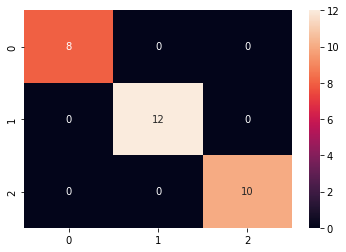

In [11]:
# Visualización de la matriz de confusión para KNN
print('Matriz de confusion KNN:')
cmKNN = confusion_matrix (y_test, y_pred)
plt.figure()
sns.heatmap(cmKNN, annot = True)                         

In [12]:
# Reporte de clasificación de KNN 
print('Reporte de clasificación KNN:')
print(classification_report(y_test, y_pred))

Reporte de clasificación KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Matriz de confusion SVM:


<AxesSubplot:>

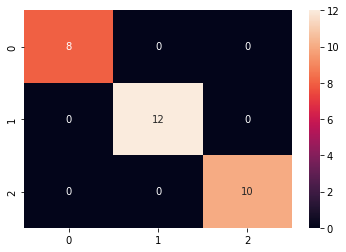

In [13]:
# Visualización de la matriz de confusión para SVM
print ('Matriz de confusion SVM:')
cmSVM = confusion_matrix (y_test, y_pred_svm)
plt.figure()
sns.heatmap(cmSVM, annot = True)

In [14]:
# Reporte de clasificación para SVM
print('Reporte de clasificación SVM:')
print(classification_report(y_test, y_pred_svm))

Reporte de clasificación SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# PENGUINS

In [15]:
# Cargamos los datos de penguins
penguins = pd.read_csv("penguins.csv")

In [16]:
# Rellenamos los valores nulos con la media de cada columna
penguins = penguins.fillna(penguins.mean())

In [17]:
# Mostramos las primeras 5 filas del DataFrame penguins
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.10000,18.70000,181.000000,3750.000000,0
1,39.50000,17.40000,186.000000,3800.000000,0
2,40.30000,18.00000,195.000000,3250.000000,0
3,43.92193,17.15117,200.915205,4201.754386,0
4,36.70000,19.30000,193.000000,3450.000000,0


In [18]:
# Mostrar la información acerca de penguins como el numero de filas, columnas, tipo de datos y valores nulos
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   344 non-null    float64
 1   CulmenDepth    344 non-null    float64
 2   FlipperLength  344 non-null    float64
 3   BodyMass       344 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [19]:
# Mostrar estadísticas descriptivas de penguins, media, desviación estandar, el mínimo, máximo, etc
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.443643,1.969027,14.020657,799.613058,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,44.250000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


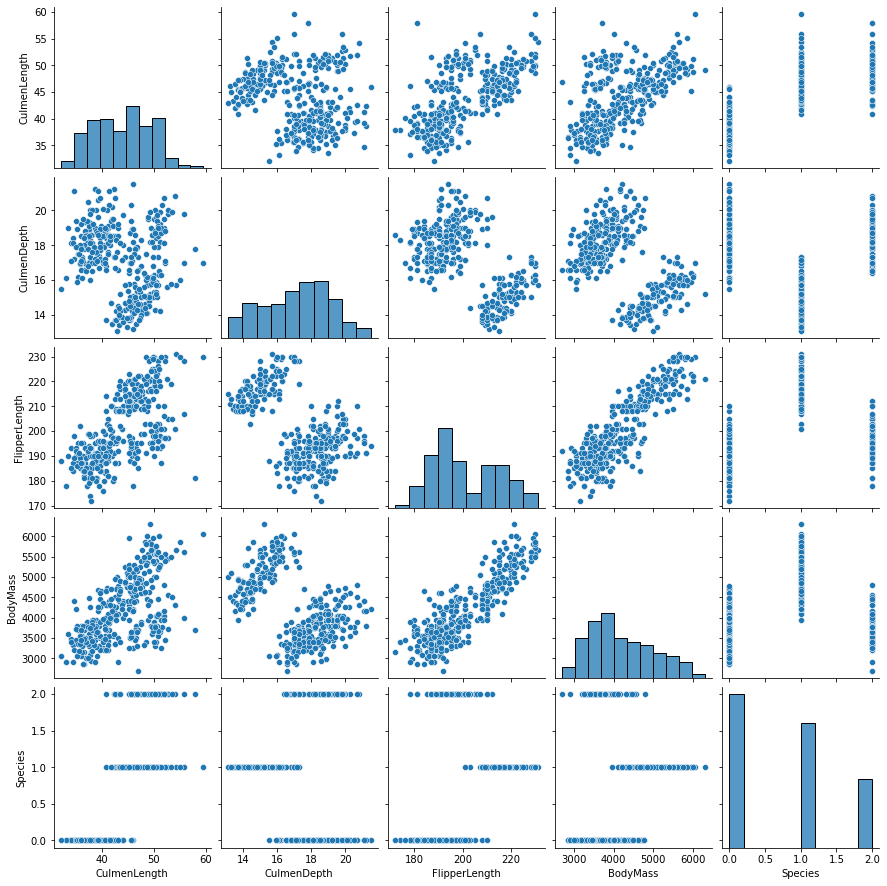

In [20]:
# Visualización de las relaciones entre todas las variables de penguins
sns.pairplot(penguins)

In [21]:
# Crear un nuevo DataFrame X_penguin que contiene todas las columnas del dataset excepto la columna "Species"
X_penguin = penguins.drop(columns=["Species"])

# Crear una nueva Serie y_penguin que contiene solo la columna "Species" del dataset
y_penguin = penguins.Species

# Mostrar las primeras 5 filas de X_penguin
X_penguin.head()

# Mostrar las primeras 5 filas de y_penguin
y_penguin.head()

# Convertir X_penguin en un array NumPy
X_penguin = X_penguin.to_numpy()

# Convertir y_penguin en un array NumPy
y_penguin = y_penguin.to_numpy()

In [22]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_penguin, y_penguin, test_size = 0.2)

In [23]:
# Crear k-NN con k = 5
KNN = KNeighborsClassifier(n_neighbors = 5)

In [24]:
# Entrenar el modelo utilizando el conjunto de entrenamiento
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Predecir las clases para el conjunto de prueba
y_pred = KNN.predict(X_test)

In [26]:
# Crear SEV con kernel lineal
SVM = SVC(kernel = 'linear')

In [27]:
# Entrenar el modelo SVM con el conjunto de entrenamiento
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
# Predecir las clases para el conjunto de prueba utilizando el modelo SVM
y_pred_svm = SVM.predict(X_test)

In [29]:
# Aplicación de validación cruzada para KNN y SVM con 10 iteraciones
CV_KNN = cross_val_score(KNN, iris.data, iris.target, cv = 10)
CV_SVM = cross_val_score(SVM, iris.data, iris.target, cv = 10)

# Visualización de los resultados de la VC para KNN y SVM
print('Validación cruzada K-NN:', CV_KNN)
print('Validación cruzada SVM', CV_SVM)

Validación cruzada K-NN: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Validación cruzada SVM [1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]


Matriz de confusion KNN:


<AxesSubplot:>

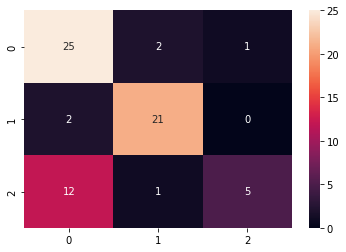

In [30]:
# Visualización de la matriz de confusión para KNN
print('Matriz de confusion KNN:')
cmKNN = confusion_matrix (y_test, y_pred)
plt.figure()
sns.heatmap(cmKNN, annot = True)    

In [31]:
# Reporte de clasificación de KNN 
print('Reporte de clasificación KNN:')
print(classification_report(y_test, y_pred))

Reporte de clasificación KNN:
              precision    recall  f1-score   support

           0       0.64      0.89      0.75        28
           1       0.88      0.91      0.89        23
           2       0.83      0.28      0.42        18

    accuracy                           0.74        69
   macro avg       0.78      0.69      0.69        69
weighted avg       0.77      0.74      0.71        69



Matriz de confusion SVM:


<AxesSubplot:>

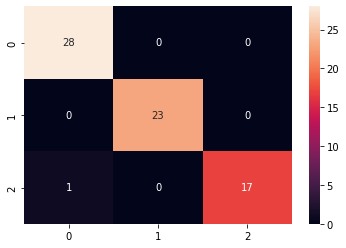

In [32]:
# Visualización de la matriz de confusión para SVM
print ('Matriz de confusion SVM:')
cmSVM = confusion_matrix (y_test, y_pred_svm)
plt.figure()
sns.heatmap(cmSVM, annot = True)

In [33]:
# Reporte de clasificación para SVM
print('Reporte de clasificación SVM:')
print(classification_report(y_test, y_pred_svm))

Reporte de clasificación SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      1.00      1.00        23
           2       1.00      0.94      0.97        18

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



# Discusión al comparar los resultados del dataset elegido para ambos modelos

En comparación, se puede observar que el modelo SVM tiene un rendimiento generalmente mejor que el modelo KNN en términos de precisión, recall y F1-score para todas las clases. El modelo SVM alcanza valores cercanos a la perfección en todas las métricas para las clases 0 y 1, mientras que para la clase 2 presenta una ligera disminución en las métricas de recall y F1-score. Por otro lado, el modelo KNN muestra una precisión moderada y un rendimiento variado en las métricas de recall y F1-score, con un recall muy bajo para la clase 2.

En resumen, si se busca un modelo con un rendimiento generalmente mejor en la clasificación de estas clases aplicado al dataset penguins, el modelo SVM sería la opción preferida en comparación con el modelo KNN.